# Climatology

In this tutorial, we'll look at how to use wxee to calculate long-term climatological means of gridded weather data. wxee supports the following climatology methods which can be applied to an `ee.ImageCollection` using the `wx` accessor: `climatology_dayofyear`, `climatology_month`

## Setup

In [1]:
import ee
import wxee

ee.Initialize()

## Monthly Median VPD

gridMET contains daily weather data including vapor pressure deficit (VPD). We'll load 10 years of data from 2000 - 2010, giving us several thousand daily images.

In [2]:
gridmet = ee.ImageCollection("IDAHO_EPSCOR/GRIDMET").select("vpd")
gridmet = gridmet.filterDate("2000", "2010")

gridmet.size().getInfo()

3653

Now, we'll calculate the monthly median climatology over the 10 years, giving us just 12 images (one per month).

In [3]:
clim = gridmet.wx.climatology_month(ee.Reducer.median())
clim.size().getInfo()

12

Finally, we'll download the monthly normals as an xarray dataset and plot them.

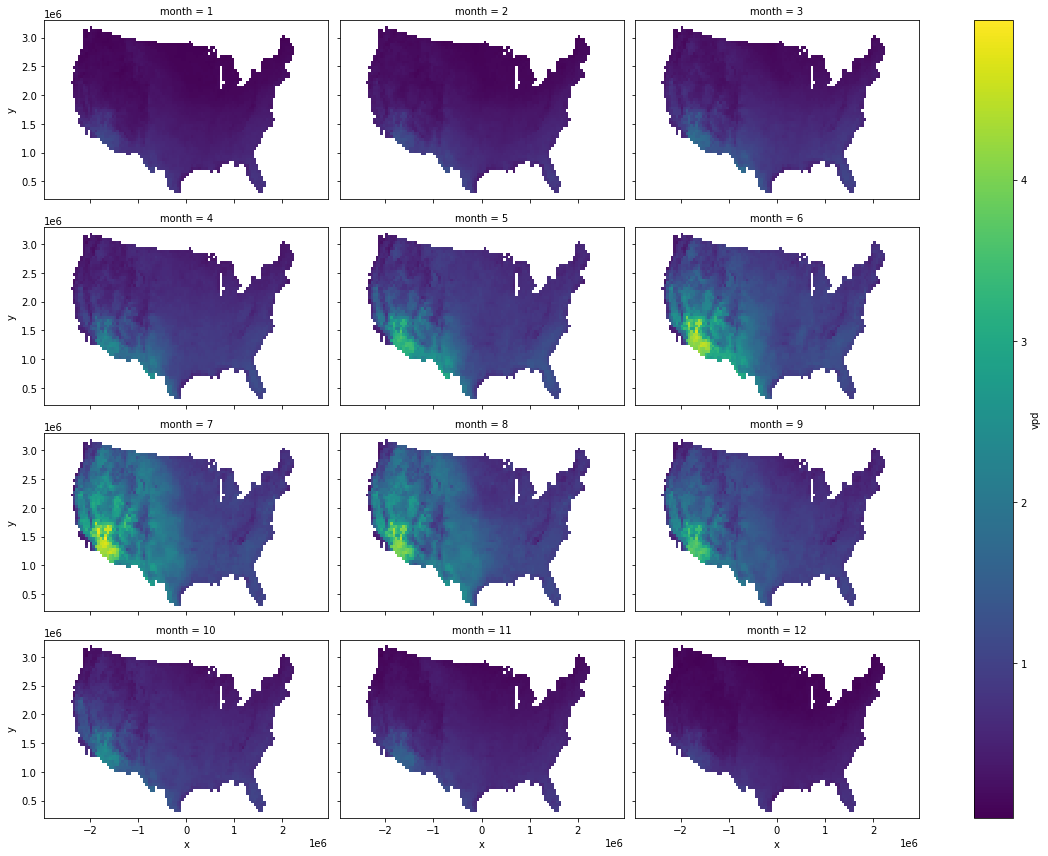

In [4]:
x = clim.wx.to_xarray(scale=50_000, crs="EPSG:5070")
x.vpd.plot(col="month", col_wrap=3, figsize=(16, 12))

Unsurprisingly, high VPDs in July (month 7) indicate that it was the driest month of the year on average between 2000 and 2010.

## Climatology vs. Temporal Resampling
Climatology and temporal resampling share some characteristics--both use reducers to aggregate time series of images--so it's important to understand the difference. The easiest way to compare the two is to think about how they would handle the example above with 10 years of raw data:


- __Raw data__: 3653 images (1 per day per year) 
  - __Monthly median climatology__: 12 images (1 per month)
    - Each image is the monthly median VPD over all 10 years (e.g. October).
  - __Monthly median temporal resampling__: 120 images (1 per month per year)
    - Each image is the monthly median VPD in one year (e.g. October 2005).

## Daily Max Precipitation

Once again we'll look at gridMET daily weather data, but this time we'll calculate climatological mean of maximum precipitation by day-of-year.

In [5]:
gridmet = ee.ImageCollection("IDAHO_EPSCOR/GRIDMET").select("pr")
gridmet = gridmet.filterDate("2000", "2005")

A day-of-year climatology will give 366 images, one for each day through the 5 years (including leap days).

In [6]:
clim = gridmet.wx.climatology_dayofyear(ee.Reducer.max())
clim.size().getInfo()

366

We could download all 366 images, but maybe we're only interested in daily precipitation in the month of March. We can use the `start` and `end` args to set the climatological window of days to look at. Here we'll set the start to 60 (March 1) and the end to 90 (March 30). Now we only have 31 images.

In [7]:
clim = gridmet.wx.climatology_dayofyear(ee.Reducer.max(), start=60, end=90)
clim.size().getInfo()

31

<div class="alert alert-block alert-info">
<b>Tip:</b> Downloading is the slowest part of dealing with Earth Engine data in wxee, so it's always best to aggregate and filter your data before downloading.
</div>

Let's download and plot them.

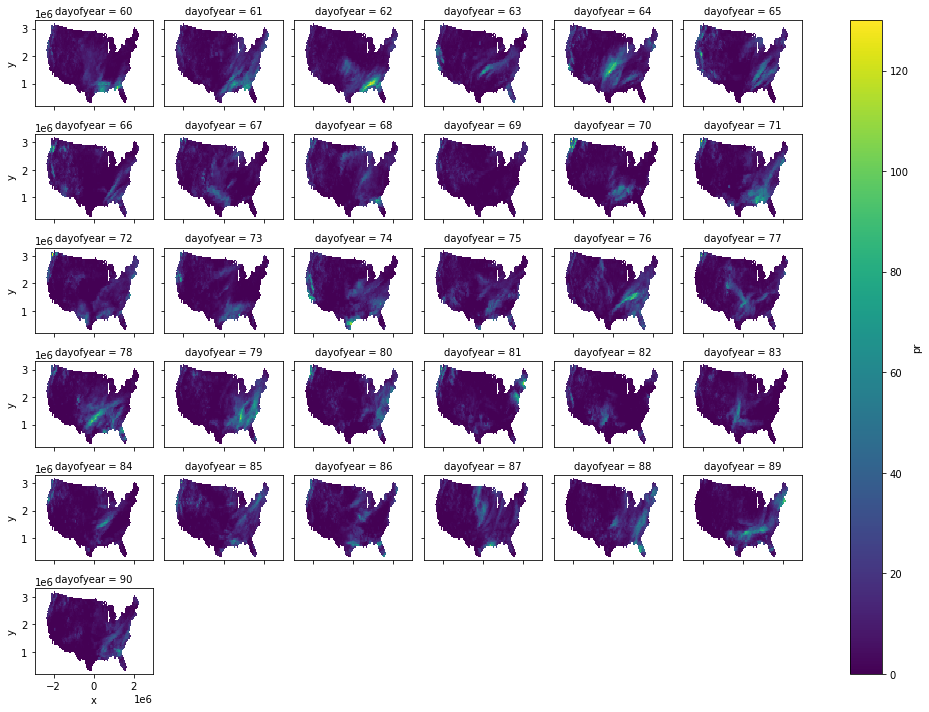

In [8]:
march_ppt = clim.wx.to_xarray(scale=50_000, crs="EPSG:5070")
march_ppt.pr.plot(col="dayofyear", col_wrap=6, figsize=(14, 10))